In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## tree.init()

In [135]:
data=pd.read_csv(os.getcwd()+f"\\data\\M5\\sales_train_validation.csv")

# type=spatial
levels=data.columns[pd.to_datetime(data.columns, errors='coerce').isna()]
time_index=pd.to_datetime(data.drop(columns=levels).columns)

levels=data.columns[pd.to_datetime(data.columns, errors='coerce').isna()]
date_time_index=pd.to_datetime(data.drop(columns=levels).columns)

df=data[levels]
list_of_leafs=df.values.tolist()

for level in levels[::-1]:
    df[level]=None
    df=df.drop_duplicates()
    list_of_leafs.extend(df.values.tolist())
    
            
def sort_key(item):
    none_count = item.count(None)
    return (-none_count, item)
        
list_of_leafs=sorted(list_of_leafs, key=sort_key)
mY=np.zeros( (len(list_of_leafs), len(time_index)))

def subset_data(l:list):
    """
    subsets data to include only data of a certain leaf
    leaf_list (list)  size n, [0] is the level 0 while [-1] is the lowest level
    
    returns: serried of aggregated values for a given leaf_list
    """
    column_mask=(data[levels]==l).any(axis=0)  
    row_mask=(data[levels]==l).loc[:,column_mask].all(axis=1)
    
    srY=data[row_mask].drop(columns=levels).sum(axis=0)
    return srY

for i,leaf_creds in enumerate(list_of_leafs):
    mY[i]=subset_data(leaf_creds).values

# Get summattion matrix S                              
mS=np.ones((1,data.shape[0])) # start with 1 row at the top of matrix s that is always a vector of ones of size equal to # of bottom level series

def create_matrix_S(lengths):
    """
    Method used to create mS matrix
    
    """
    # if isinstance( lengths , str):
    # elif lengths=='W':
    #     lenghts=np.full()
    # elif lengths=="M":
    #     lengths=np.full(1,12)
    # elif lengths=="Q":
    #     lengths=np.full(4,3)
    # elif lengths=="A":
    #     lengths=np.full(12,1)    
    
    total_columns = sum(lengths)
    matrix = np.zeros((len(lengths), total_columns), dtype=int)
    
    start_index = 0
    for i, length in enumerate(lengths):
        matrix[i, start_index:start_index + length] = 1
        start_index += length
    
    return matrix

for i,level in enumerate(levels.to_list()):
    vNonZeroEntries=data.groupby(levels.to_list()[:i+1]).count().iloc[:,0].values
    mS=np.vstack([mS,create_matrix_S(vNonZeroEntries)])  

C:\Users\31683\AppData\Local\Temp\ipykernel_18388\4291951752.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[level]=None


In [136]:
for i,level in enumerate(levels.to_list()):
    groupByColumns=levels.to_list()[:i+1]
    vBtmLevelSeries=data.groupby(groupByColumns).count().iloc[:,0].values
    mS=np.vstack([mS,create_matrix_S(vBtmLevelSeries)])  
    

In [137]:
data = pd.DataFrame(data=mY[i], index=date_time_index , columns=['y'])
data= data.resample('M').sum()[1:] #added 1: because January is not full
data


,y
2011-02-28,196259.00
2011-03-31,198727.00
2011-04-30,186028.00
2011-05-31,176376.00
2011-06-30,184779.00
...,...
2015-12-31,340698.00
2016-01-31,368104.00
2016-02-29,379113.00
2016-03-31,393142.00


In [138]:
levels=['T','H','D','W','M','Q','A']
dLevels={'T': 60 , 'H' :24 , 'D': 7 , 'W':1, 'M': 3 , 'Q':4 , 'A': 1}

In [139]:
start_index = levels.index(data.index.inferred_freq) #the bottom frequency, the freq of data
end_index = 3 if start_index<3 else 6   
   
levels=levels[start_index:end_index + 1] 
dLevels={key: dLevels[key] for key in levels}

if end_index==3: # works only for W and M data currently
    start_index = data[data.index.weekday == 0].index[0]
    end_index = data[data.index.weekday==6].index[-1]
else:
    start_index = data[data.index.month == 1].index[0]
    end_index = data[data.index.month==12].index[-1]

df=data[start_index:end_index]

print(levels)
df

['M', 'Q', 'A']


,y
2012-01-31,224580.00
2012-02-29,224966.00
2012-03-31,238285.00
2012-04-30,217738.00
2012-05-31,246415.00
2012-06-30,294983.00
2012-07-31,294109.00
2012-08-31,286525.00
2012-09-30,283831.00
2012-10-31,267852.00


In [151]:
np.array(list(dRows.values())).sum()


17

In [152]:

aUnits=np.array([])
dRows={}
n=1

for sFreq in reversed(levels):
    n=dLevels[sFreq]*n
    aUnits=np.append(aUnits,int(n))
    dRows[sFreq]=int(n)
aUnits=aUnits[::-1].astype(int) 

print(dRows)
n=int(aUnits.sum())
# n = np.array(list(dRows.values())).sum()
m=df.resample(levels[-1]).sum().shape[0]
print(n)
print(m)
mY=df.values.reshape( ( m , dRows[levels[0]] )).T
mS=create_matrix_S([dRows[levels[0]]])
print(mY)
print(mS)
print("loop")

for i,sFreq in enumerate(levels[1:]):
    df=df.resample(sFreq).sum()
    n = aUnits[i+1]
    
    mY_=df.values.reshape(( m ,n)).T 
    mY=np.vstack((mY_, mY))

    vBtmLevelSeries=np.full(aUnits[-i-2],int(aUnits[0]/aUnits[-i-2]))
    mS_=create_matrix_S(vBtmLevelSeries)
    mS=np.vstack(( mS, mS_ ))

    
print(mY)
print(mS)


{'A': 1, 'Q': 4, 'M': 12}
17
4
[[224580. 303591. 304147. 324045.]
 [224966. 307941. 297317. 311365.]
 [238285. 330713. 317009. 319054.]
 [217738. 282731. 301173. 311929.]
 [246415. 283255. 298299. 328103.]
 [294983. 291664. 300320. 321299.]
 [294109. 299922. 311753. 343689.]
 [286525. 313940. 327304. 343456.]
 [283831. 308990. 300603. 339548.]
 [267852. 305161. 314795. 363349.]
 [291225. 295535. 301408. 328215.]
 [311310. 300450. 293557. 340698.]]
[[1 1 1 1 1 1 1 1 1 1 1 1]]
loop
[[3181819. 3623893. 3667685. 3974750.]
 [ 687831.  942245.  918473.  954464.]
 [ 759136.  857650.  899792.  961331.]
 [ 864465.  922852.  939660. 1026693.]
 [ 870387.  901146.  909760. 1032262.]
 [ 224580.  303591.  304147.  324045.]
 [ 224966.  307941.  297317.  311365.]
 [ 238285.  330713.  317009.  319054.]
 [ 217738.  282731.  301173.  311929.]
 [ 246415.  283255.  298299.  328103.]
 [ 294983.  291664.  300320.  321299.]
 [ 294109.  299922.  311753.  343689.]
 [ 286525.  313940.  327304.  343456.]
 [ 28383

## tree.forecast()



In [38]:
from importlib import reload
import forecast_prophet
reload(forecast_prophet)
from forecast_prophet import *


c:\Users\31683\AppData\Local\Programs\Python\Python38\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [96]:
# TODO forecast iOoS is selected exactly so that full year is available, this is not dynamic
iOoS=2 #month ahead
# multiple=int(iOoS/aUnits[0])
dRows
dForec={}
for sFreq in levels:
    # dForec[sFreq]=multiple*dRows[sFreq]
print(dForec)
print(dRows)


{'M': 24, 'Q': 8, 'A': 2}
{'A': 1, 'Q': 4, 'M': 12}


In [48]:
vYhat=np.array([])

for i,sFreq in enumerate(levels):  # starts from bottom
    dfData=data.resample(sFreq).sum()
    pht=Forecast_Prophet(dfData=dfData, iOoS=(aUnits*multiple)[i])
    vYhat_ = pht.forecast(holidays=None, changepoints=None).yhat.values
    vYhat=np.concatenate((vYhat_, vYhat)) 
mYhat=vYhat    
print(mYhat)


10:32:49 - cmdstanpy - INFO - Chain [1] start processing
10:32:49 - cmdstanpy - INFO - Chain [1] done processing
10:32:50 - cmdstanpy - INFO - Chain [1] start processing
10:32:50 - cmdstanpy - INFO - Chain [1] done processing


[29994.13630839 44610.59204099 52306.00374357 ... 12073.00428926
 13773.53108723 12551.03384587]


In [49]:
mYhat.shape

(2219,)

In [97]:
print(mY.shape)
print(aUnits)
print(levels)
print(mS)
print('__')
n=mY.shape[0]
m=int(iOoS/aUnits[0])
mYhat=np.zeros((n,m))
print(n)
print(m)
print(dForec)
print(dRows)

(17, 5)
[12  4  1]
['M', 'Q', 'A']
[[1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 1 1]
 [1 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 1]]
__
17
2
{'M': 24, 'Q': 8, 'A': 2}
{'A': 1, 'Q': 4, 'M': 12}


In [102]:
data.resample('M').sum()
sFreq

(0, 'M')

In [111]:
n=mY.shape[0]
m=int(iOoS/aUnits[0])
mYhat=np.zeros((n,m))

for sFreq in levels:  # start from the top
    df=data.resample(sFreq).sum()
    h=dForec[sFreq]
    pht=Forecast_Prophet(dfData=df, iOoS=h)
    vYhat_ = pht.forecast(holidays=None, changepoints=None).yhat.values
    
    vYhat=vYhat_[-h:]
    vYhatIS=vYhat_[:-h]
    
    mYhat_ = vYhat.reshape((dRows[sFreq],int(dForec[sFreq]/dRows[sFreq])))
    mYhatIS_ = vYhatIS.reshape((dRows[sFreq],int(len(vYhatIS)/dRows[sFreq])))  
    
    mYhat=np.vstack((mYhat, mYhat_))
    mYhatIS=np.vstack((mYhat, mYhatIS_))
    
    


11:45:49 - cmdstanpy - INFO - Chain [1] start processing
11:45:50 - cmdstanpy - INFO - Chain [1] done processing


ValueError: cannot reshape array of size 64 into shape (12,5)

In [121]:
60/12

5.0

In [120]:
df

,y
2011-01-31,24209.00
2011-02-28,196259.00
2011-03-31,198727.00
2011-04-30,186028.00
2011-05-31,176376.00
...,...
2015-12-31,340698.00
2016-01-31,368104.00
2016-02-29,379113.00
2016-03-31,393142.00


In [177]:
mYhat

array([37830.48779292, 35555.24593205, 35463.06239927, 35968.4673274 ,
       40329.0932741 , 48050.48573985, 47985.71976663, 40065.30274424,
       37894.33013062, 37811.92687734, 38236.94357302, 42433.76154498,
       49916.60761868, 49548.73993521, 41272.00737472, 38703.75503293,
       38196.09831352, 38181.51082614, 41938.54665443, 48996.0588687 ,
       48232.23689537, 39603.93169763, 36743.21744681, 36016.20197586,
       35868.03678515, 39587.96941008, 46712.8381068 , 46125.38295743])

In [69]:
dfData.values[:7*4].reshape((4,7)).T

array([[56152., 41280., 44820., 42829.],
       [52412., 45477., 37538., 46271.],
       [46902., 45419., 36470., 48583.],
       [42201., 45971., 44003., 43542.],
       [48107., 37286., 47780., 40196.],
       [48006., 38859., 43675., 47529.],
       [46243., 41579., 38974., 46938.]])

In [65]:
dfData.values.reshape((7,39))

array([[56152., 52412., 46902., 42201., 48107., 48006., 46243., 41280.,
        45477., 45419., 45971., 37286., 38859., 41579., 44820., 37538.,
        36470., 44003., 47780., 43675., 38974., 42829., 46271., 48583.,
        43542., 40196., 47529., 46938., 44060., 40673., 46386., 48174.,
        47957., 41264., 46630., 53113., 52834., 43262., 43280.],
       [52114., 50881., 47737., 41134., 49820., 54098., 52319., 42520.,
        45379., 56894., 56247., 49186., 45938., 57730., 59352., 52855.,
        48539., 54567., 58168., 55005., 49108., 47869., 57138., 55560.,
        45664., 45381., 57734., 56077., 58060., 53028., 62266., 69907.,
        73122., 64179., 62893., 78741., 73771., 61403., 55472.],
       [67400., 69730., 66808., 56724., 64091., 72266., 70623., 60669.,
        56902., 68364., 67931., 53899., 55449., 70471., 77030., 71461.,
        55903., 63545., 76575., 73439., 70253., 55322., 78120., 75748.,
        72226., 59953., 69738., 76017., 88548., 68951., 76097., 77155.,
      

In [49]:
mYhatIS.shape

(7, 273)

In [47]:
aUnits

array([7, 1])

In [50]:
n

8

In [7]:
data=pd.read_csv(os.getcwd()+f"\\data\\M5\\sales_train_validation.csv")
calendar=pd.read_csv(os.getcwd()+f"\\data\\M5\\calendar.csv")
levels=data.columns[pd.to_datetime(data.columns, errors='coerce').isna()]
time_index=pd.to_datetime(data.drop(columns=levels).columns)

C:\Users\31683\AppData\Local\Temp\ipykernel_12056\1863684036.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  levels=data.columns[pd.to_datetime(data.columns, errors='coerce').isna()]


In [8]:
evaluation=pd.read_csv(os.getcwd()+f"\\data\\M5\\sales_train_evaluation.csv")
evaluation.shape

(70, 32)

In [15]:
def subset_data(leaf_list):
    """
    subsets data to include only data of a certain leaf
    leaf_list (list) list of size n, [0] is the level 0 while [-1] is the lowest level
    
    returns: serried of aggregated values for a given leaf_list
    """
    column_mask=(data[levels]==leaf_list).any(axis=0)  #should levels be levels?
    row_mask=(data[levels]==leaf_list).loc[:,column_mask].all(axis=1)
    
    srY=data[row_mask].drop(columns=levels).sum(axis=0)
    return srY

In [16]:
for i,leaf_creds in enumerate(list_of_leafs):
    # setattr(self, f"leaf_{i}", Leaf(date=date, 
    #                                 dfData=subset_data(leaf_creds),
    #                                 leaf=leaf_creds # list of leaf credentials
    #                              ))
    mY[i]=subset_data(leaf_creds).values

In [17]:
list_of_leafs

[[None, None, None, None],
 ['CA', None, None, None],
 ['TX', None, None, None],
 ['WI', None, None, None],
 ['CA', 1, None, None],
 ['CA', 2, None, None],
 ['CA', 3, None, None],
 ['CA', 4, None, None],
 ['TX', 1, None, None],
 ['TX', 2, None, None],
 ['TX', 3, None, None],
 ['WI', 1, None, None],
 ['WI', 2, None, None],
 ['WI', 3, None, None],
 ['CA', 1, 'FOODS', None],
 ['CA', 1, 'HOBBIES', None],
 ['CA', 1, 'HOUSEHOLD', None],
 ['CA', 2, 'FOODS', None],
 ['CA', 2, 'HOBBIES', None],
 ['CA', 2, 'HOUSEHOLD', None],
 ['CA', 3, 'FOODS', None],
 ['CA', 3, 'HOBBIES', None],
 ['CA', 3, 'HOUSEHOLD', None],
 ['CA', 4, 'FOODS', None],
 ['CA', 4, 'HOBBIES', None],
 ['CA', 4, 'HOUSEHOLD', None],
 ['TX', 1, 'FOODS', None],
 ['TX', 1, 'HOBBIES', None],
 ['TX', 1, 'HOUSEHOLD', None],
 ['TX', 2, 'FOODS', None],
 ['TX', 2, 'HOBBIES', None],
 ['TX', 2, 'HOUSEHOLD', None],
 ['TX', 3, 'FOODS', None],
 ['TX', 3, 'HOBBIES', None],
 ['TX', 3, 'HOUSEHOLD', None],
 ['WI', 1, 'FOODS', None],
 ['WI', 1, 'HOBB

In [18]:
m= data.shape[0]
mS=np.ones((1,m))

def create_matrix_S(lengths):
    total_columns = sum(lengths)
    matrix = np.zeros((len(lengths), total_columns), dtype=int)
    
    start_index = 0
    for i, length in enumerate(lengths):
        matrix[i, start_index:start_index + length] = 1
        start_index += length
    
    return matrix

for i,level in enumerate( levels.to_list()):
    vNonZeroEntries= data.groupby( levels.to_list()[:i+1]).count().iloc[:,0].values
    mS=np.vstack([mS,create_matrix_S(vNonZeroEntries)])

mS

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [19]:
mYhatIS = np.zeros((mY.shape[0], mY.shape[1]))
iIS = len(time_index)
mRes = np.zeros((mY.shape[0], mY.shape[1]))   

In [20]:
iOoS=28
mYhat=np.zeros((len(list_of_leafs),iOoS))
mYhat.shape

(114, 28)

In [21]:
try:
    holidays=pd.read_csv(os.getcwd()+f"\\data\\M5\\holidays.csv")
    holidays=holidays.values.flatten()
except: 
    holidays=None
    
try:
    changepoints=pd.read_csv(os.getcwd()+f"\\data\\M5\\changepoints.csv")
    changepoints=changepoints.values.flatten()
except: 
    changepoints=None    

In [163]:
holidays

array(['2011-02-06', '2011-02-14', '2011-02-21', '2011-03-09',
       '2011-03-16', '2011-03-17', '2011-03-20', '2011-04-24',
       '2011-04-26', '2011-05-05', '2011-05-08', '2011-05-30',
       '2011-05-31', '2011-06-12', '2011-06-19', '2011-07-04',
       '2011-08-01', '2011-08-31', '2011-09-05', '2011-10-10',
       '2011-10-31', '2011-11-07', '2011-11-11', '2011-11-24',
       '2011-12-25', '2011-12-28', '2012-01-01', '2012-01-07',
       '2012-01-16', '2012-02-05', '2012-02-14', '2012-02-20',
       '2012-02-22', '2012-02-29', '2012-03-08', '2012-03-17',
       '2012-04-08', '2012-04-14', '2012-04-15', '2012-05-05',
       '2012-05-13', '2012-05-28', '2012-06-12', '2012-06-17',
       '2012-06-21', '2012-07-04', '2012-07-20', '2012-08-19',
       '2012-09-03', '2012-10-08', '2012-10-26', '2012-10-31',
       '2012-11-11', '2012-11-22', '2012-12-16', '2012-12-25',
       '2013-01-01', '2013-01-07', '2013-01-21', '2013-02-03',
       '2013-02-13', '2013-02-14', '2013-02-18', '2013-

In [22]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import pandas as pd
import numpy as np
from numpy.linalg import inv
import os
import pandas as pd
import numpy as np
import os
from datetime import datetime,timedelta
from scipy.interpolate import splrep, splev
import re
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import plotly.graph_objs as go
from statsmodels.tsa.arima.model import ARIMA
from sklearn.linear_model import LinearRegression
pd.set_option('display.float_format', lambda x: '{:.2f}'.format(x))
import statsmodels.api as sm
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=UserWarning)
from pmdarima.arima import auto_arima
from pandas import to_datetime
from prophet import Prophet
import logging
import cmdstanpy
logging.getLogger('cmdstanpy').setLevel(logging.WARNING)
from dateutil.relativedelta import relativedelta
import  skfda
from skfda.preprocessing.dim_reduction import FPCA
import fdata
from fdata import FData


"""

This class contains methods for forecasting a single series
Forecast is an object, that must be an object because we might want to generate several forecasts in the future
using that same data and compare. We dont want to run the whole process again just to be able to do that

"""

class Forecast:
    def __init__(self, dfData: pd.DataFrame, iOoS:int , lX=None ):
        """
        dfData          : dataframe with column y to forecast
        iOoS            : integer number of oos observations to forecast
        lX              : list of strings, x columns as extra regressors, if None , then only Y is present
        
        """
        dfData=dfData    # data , [0] to be forecasted, index must be datetime index 
        self.iOoS=iOoS  # number of OoS forecast to generate in the same granularity as srY
        self.srYhat=None     # forecasted series TODO

        
    def Prophet(self, 
                dfX=None,
                scaling="absmax",
                holidays=None,
                changepoints=None,
                changepoint_prior_scale=0.05,
                holidays_prior_scale=0.9,
                yearly_seasonality=20):
        """
        Fit Prophet model for daily (or monthly data? TODO)
        regressor self.x must be known also for OoS forecast part. Use other method otherwise
        TODO add a predictor for X columns via Prophet or predict X out of this method via other methods
        and feed back to this method
        
        
        dfX (df)        : lX columns in self.dfData but extended with iOoS (predicted via Prophet or other method or available as data)
        holidays (list)        : of strings, can be days or days representing whole month
                                 if later, then whole month must be taken as a holiday
        changepoints (list)    : of strings, same as above, represents changes in slope of the trend
        
        
        returns dfModel
        dfModel.vYhat is the fitted and predicted vYhat of len(self.iOoS + len(dfData))
        
        """
        sFreq=self.dfData.index.inferred_freq
        if sFreq is None:
            print("frequency non inferrable, please provide regular frequency index")
            return None
        
        
        df=self.dfData['y'].copy().reset_index()
        df.rename(columns={'index' : 'ds'}, inplace=True)
 
        if holidays is not None: # then there are holidays to incorporate
            holiday_dfs=[]
            for i,holiday in enumerate(holidays): 
                h=pd.DataFrame({
                                'holiday': str(i+1), #holiday name , #TODO redundant?
                                'ds': pd.to_datetime([holidays[i]])
                                })
                holiday_dfs.append(h)
            df_holidays=pd.concat(holiday_dfs, ignore_index=True)
                   
        model=Prophet(holidays=df_holidays , 
                      scaling=scaling ,
                      changepoints=changepoints,
                      changepoint_prior_scale=changepoint_prior_scale,
                      holidays_prior_scale=holidays_prior_scale,
                      yearly_seasonality=yearly_seasonality)
        
        if dfX is not None: # add regressors
            for regressor in dfX.columns:
                #TODO prior scale might need to be adjusted based on regressor 
                model.add_regressor(regressor,prior_scale=0.5, standardize=True)
             
        model.fit(df)
        future=model.make_future_dataframe(periods=self.iOoS , freq=sFreq)
        
        if dfX is not None:
            future[dfX.columns]=dfX
        
        dfModel=model.predict(future)
                    
        return dfModel
    
    
    def AR():
        return    
        
        
    def FPCR():
        return
    
    def VAR():
        return   
        
            
    
    


c:\Users\31683\AppData\Local\Programs\Python\Python38\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [23]:
for i in range( mY.shape[0]):
        dfData = pd.DataFrame(data= mY[i], index= time_index , columns=['y'])
        fc = Forecast(dfData=dfData, iOoS=iOoS)
        vYhat = fc.Prophet(holidays=holidays, changepoints=changepoints).yhat.values
        mYhat[i] = vYhat[-iOoS:]
        mYhatIS[i] = vYhat[:-iOoS]
mRes = mYhatIS - mY

12:27:06 - cmdstanpy - INFO - Chain [1] start processing
12:27:07 - cmdstanpy - INFO - Chain [1] done processing
12:27:09 - cmdstanpy - INFO - Chain [1] start processing
12:27:11 - cmdstanpy - INFO - Chain [1] done processing


KeyboardInterrupt: 

### Reconciliation testing

In [25]:
import pandas as pd
from importlib import reload
import numpy as np
import os

# import simulation
# reload(simulation)
# from simulation import *

import leaf
reload(leaf)
from leaf import *

import fdata
reload(fdata)
from  fdata import *

import tree
reload(tree)
from tree import *

import forecast_prophet
reload(forecast_prophet)
from forecast_prophet import *

c:\Users\31683\AppData\Local\Programs\Python\Python38\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [26]:
path=os.getcwd()+f"\\data\\M5\\sales_train_validation.csv"  # to data file 

#forecast_method = 'pick-up'
#forecast_method =  "Prophet_FPCR" 
#forecast_method =  "Prophet_FPCR"
#forecast_method =  "VAR" 
forecast_method = "Prophet"

iOoS=28 

tree=Tree( data_directory = path)
# tree.forecast( sForecMeth = forecast_method , iOoS=iOoS)

c:\Users\31683\Desktop\M5-1\tree.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[level]=None


In [29]:
dfData = pd.DataFrame(data=tree.mY[40], index=tree.time_index , columns=['y'])
dfData

,y
2011-01-29,451.00
2011-01-30,362.00
2011-01-31,319.00
2011-02-01,385.00
2011-02-02,150.00
...,...
2016-04-20,913.00
2016-04-21,1034.00
2016-04-22,1266.00
2016-04-23,1371.00


In [31]:
dfData.resample('W').sum()

,y
2011-01-30,813.00
2011-02-06,2330.00
2011-02-13,2516.00
2011-02-20,2590.00
2011-02-27,2344.00
...,...
2016-03-27,7112.00
2016-04-03,9061.00
2016-04-10,8041.00
2016-04-17,6930.00


In [34]:
dfData.index.inferred_freq

'D'

In [234]:

weight_type = "mint_shrinkage" 

tree.reconcile( sWeightType = weight_type)

evaluation_path = os.getcwd()+f"\\data\\M5\\sales_train_evaluation.csv"
tree_eval=Tree(data_directory=evaluation_path)
mYtrue=tree_eval.mY
mYhat=tree.mYhat
mYrec_mint=tree.mYrec

Reconciliation is complete


c:\Users\31683\Desktop\M5-1\tree.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[level]=None


In [233]:
weight_type =  "diag"

tree.reconcile( sWeightType = weight_type)

evaluation_path = os.getcwd()+f"\\data\\M5\\sales_train_evaluation.csv"
tree_eval=Tree(data_directory=evaluation_path)
mYtrue=tree_eval.mY
mYhat=tree.mYhat
mYrec_diag=tree.mYrec

Reconciliation is complete


c:\Users\31683\Desktop\M5-1\tree.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[level]=None


In [232]:
weight_type = "full"

tree.reconcile( sWeightType = weight_type)

evaluation_path = os.getcwd()+f"\\data\\M5\\sales_train_evaluation.csv"
tree_eval=Tree(data_directory=evaluation_path)
mYtrue=tree_eval.mY
mYhat=tree.mYhat
mYrec_full=tree.mYrec

Reconciliation is complete


c:\Users\31683\Desktop\M5-1\tree.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[level]=None


In [231]:
weight_type = None #= bottom up"

tree.reconcile( sWeightType = weight_type)


evaluation_path = os.getcwd()+f"\\data\\M5\\sales_train_evaluation.csv"
tree_eval=Tree(data_directory=evaluation_path)
mYtrue=tree_eval.mY
mYhat=tree.mYhat
mYrec_bu=tree.mYrec



Reconciliation is complete


c:\Users\31683\Desktop\M5-1\tree.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[level]=None


In [270]:
i=0

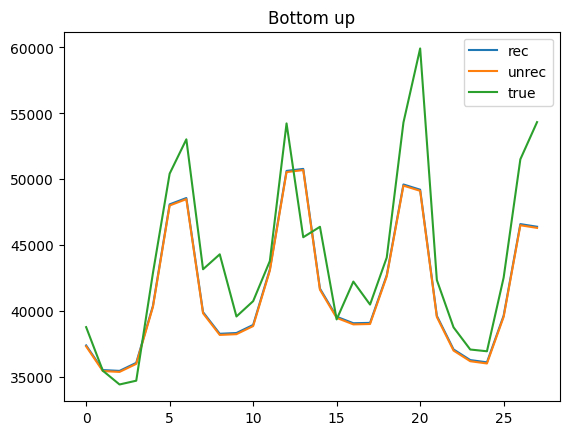

In [271]:
plt.plot(mYrec_bu[i], label='rec')
plt.plot(mYhat[i], label='unrec')
plt.plot(mYtrue[i], label='true')
plt.title('Bottom up')
plt.legend()
plt.show()

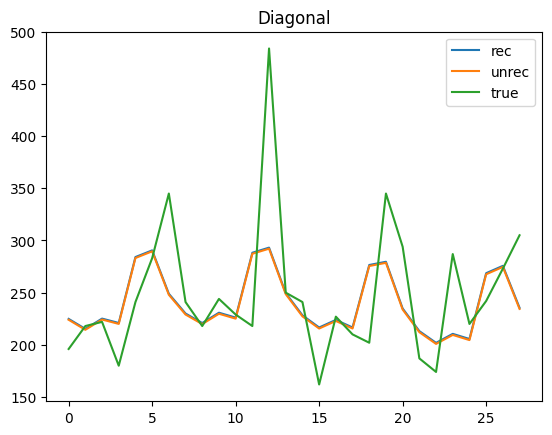

In [267]:
plt.plot(mYrec_diag[i], label='rec')
plt.plot(mYhat[i], label='unrec')
plt.plot(mYtrue[i], label='true')
plt.title('Diagonal')
plt.legend()
plt.show()

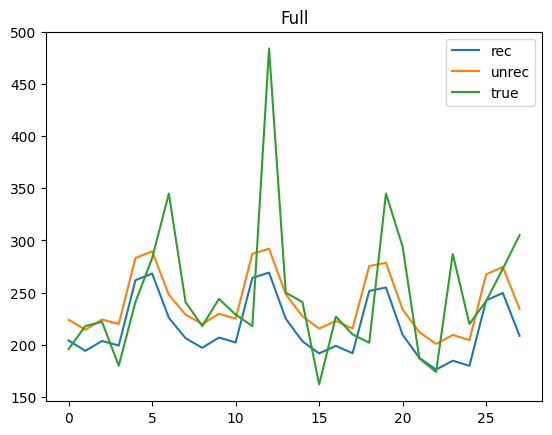

In [268]:
plt.plot(mYrec_full[i], label='rec')
plt.plot(mYhat[i], label='unrec')
plt.plot(mYtrue[i], label='true')
plt.legend()
plt.title('Full')
plt.show()

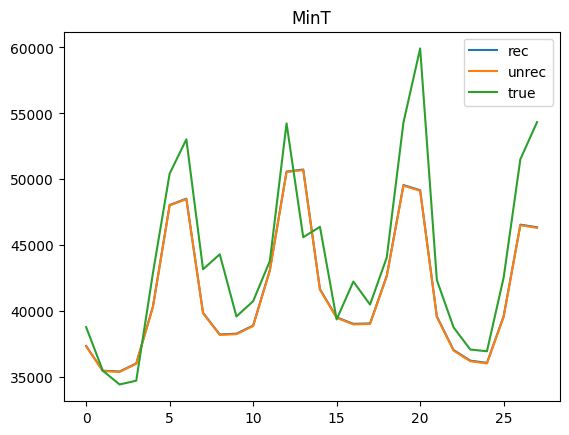

In [274]:
plt.plot(mYrec_mint[i], label='rec')
plt.plot(mYhat[i], label='unrec')
plt.plot(mYtrue[i], label='true')
plt.title('MinT')
plt.legend()
plt.show()

PCR

In [24]:
path=os.getcwd()+f"\\data\\M5\\sales_train_validation.csv"  # to data file 

forecast_method = "PCR"

iOoS=4

tree=Tree( data_directory = path)
tree.forecast( sForecMeth = forecast_method , iOoS=iOoS)

NameError: name 'Tree' is not defined

In [276]:
time_index

DatetimeIndex(['2011-01-29', '2011-01-30', '2011-01-31', '2011-02-01',
               '2011-02-02', '2011-02-03', '2011-02-04', '2011-02-05',
               '2011-02-06', '2011-02-07',
               ...
               '2016-04-15', '2016-04-16', '2016-04-17', '2016-04-18',
               '2016-04-19', '2016-04-20', '2016-04-21', '2016-04-22',
               '2016-04-23', '2016-04-24'],
              dtype='datetime64[ns]', length=1913, freq=None)

In [277]:
dfData

,y
2011-01-29,148.00
2011-01-30,195.00
2011-01-31,106.00
2011-02-01,94.00
2011-02-02,53.00
...,...
2016-04-20,148.00
2016-04-21,142.00
2016-04-22,166.00
2016-04-23,232.00


In [278]:
sFreq=dfData.index.inferred_freq
sFreq

'D'

In [64]:
mY

array([[3.2631e+04, 3.1749e+04, 2.3783e+04, ..., 4.0517e+04, 4.8962e+04,
        4.9795e+04],
       [1.4195e+04, 1.3805e+04, 1.0108e+04, ..., 1.7095e+04, 2.1834e+04,
        2.3187e+04],
       [9.4380e+03, 9.6300e+03, 6.7780e+03, ..., 1.0615e+04, 1.2266e+04,
        1.2282e+04],
       ...,
       [2.2000e+01, 1.4000e+01, 2.0000e+01, ..., 3.2000e+01, 3.2000e+01,
        2.1000e+01],
       [5.8400e+02, 5.4100e+02, 4.2000e+02, ..., 7.0100e+02, 8.0100e+02,
        7.6600e+02],
       [1.4800e+02, 1.9500e+02, 1.0600e+02, ..., 1.6600e+02, 2.3200e+02,
        2.0100e+02]])

In [63]:
data

,state_id,store_id,cat_id,dept_id,2011-01-29,2011-01-30,2011-01-31,2011-02-01,2011-02-02,2011-02-03,...,2016-04-15,2016-04-16,2016-04-17,2016-04-18,2016-04-19,2016-04-20,2016-04-21,2016-04-22,2016-04-23,2016-04-24
0,CA,1,FOODS,1,297,284,214,175,182,191,...,293,317,268,302,237,287,297,331,419,329
1,CA,1,FOODS,2,674,655,396,476,354,486,...,435,499,637,529,391,423,365,489,590,734
2,CA,1,FOODS,3,2268,2198,1398,1607,1496,1730,...,1978,2665,3099,2055,1860,1780,1871,2140,2646,2990
3,CA,1,HOBBIES,1,528,489,409,383,263,453,...,370,690,597,517,461,333,380,471,621,641
4,CA,1,HOBBIES,2,28,9,6,9,5,14,...,31,32,58,25,34,30,30,56,49,73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,WI,3,FOODS,3,2293,2383,1841,1965,1427,2760,...,2534,2659,2449,1991,1715,1579,1670,1897,2411,2233
66,WI,3,HOBBIES,1,256,342,228,183,70,285,...,304,376,200,149,249,202,182,264,381,230
67,WI,3,HOBBIES,2,22,14,20,11,4,8,...,44,35,51,25,27,42,21,32,32,21
68,WI,3,HOUSEHOLD,1,584,541,420,327,151,392,...,676,708,802,609,558,535,573,701,801,766


In [62]:
calendar



,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1964,2016-06-15,11620,Wednesday,5,6,2016,d_1965,NaN,NaN,NaN,NaN,0,1,1
1965,2016-06-16,11620,Thursday,6,6,2016,d_1966,NaN,NaN,NaN,NaN,0,0,0
1966,2016-06-17,11620,Friday,7,6,2016,d_1967,NaN,NaN,NaN,NaN,0,0,0
1967,2016-06-18,11621,Saturday,1,6,2016,d_1968,NaN,NaN,NaN,NaN,0,0,0


In [171]:
import pmdarima as pm
from pmdarima import model_selection

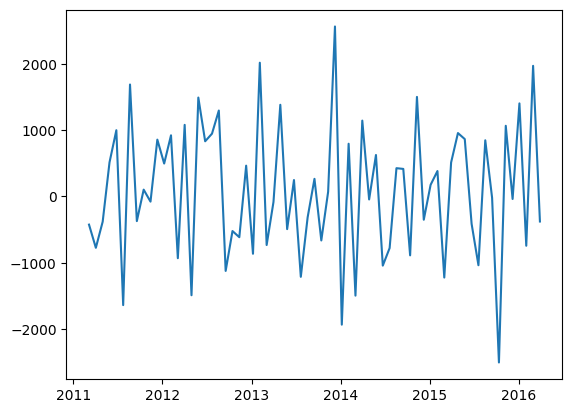

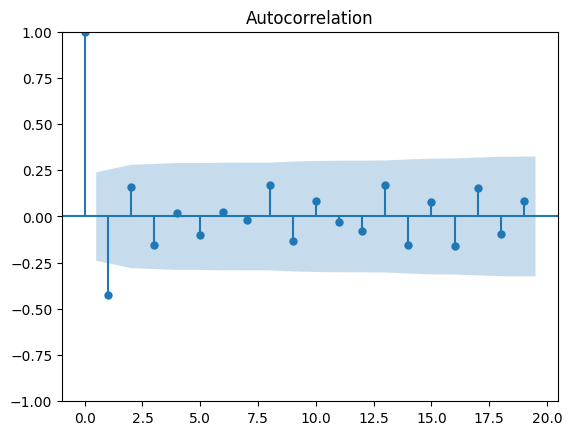

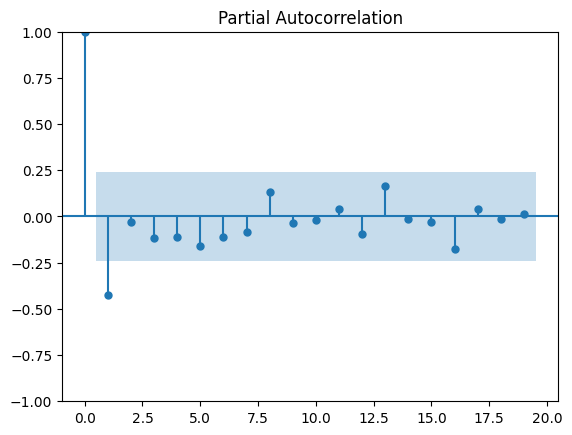

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1113.975, Time=0.49 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1123.181, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1111.798, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1110.094, Time=0.22 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1121.646, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1111.587, Time=0.32 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1111.914, Time=0.18 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1113.882, Time=0.18 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1110.765, Time=0.09 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 1.638 seconds


In [174]:
j=100
dfData=pd.DataFrame(data=mY[j][9:].reshape(int(mY[j][9:].shape[0]/28),28).T , columns=time_index[9:][::28])
plt.plot(dfData.sum(axis=0).diff().dropna())
plt.show()
plot_acf(dfData.sum(axis=0).diff().dropna())
plt.show()
plot_pacf(dfData.sum(axis=0).diff().dropna())
plt.show()



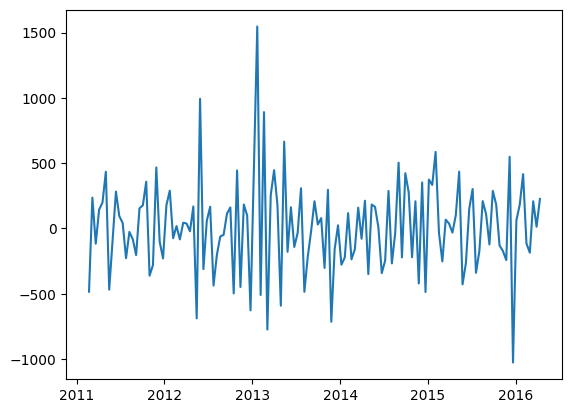

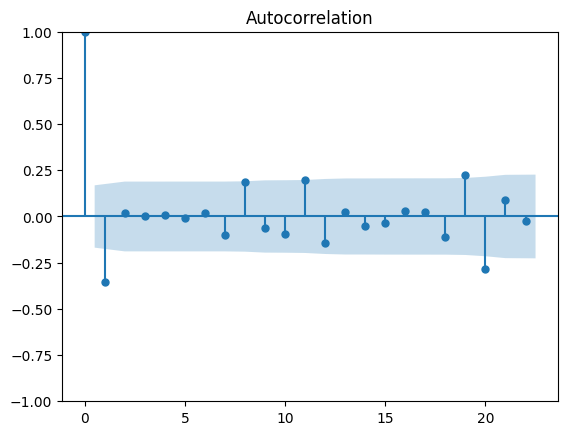

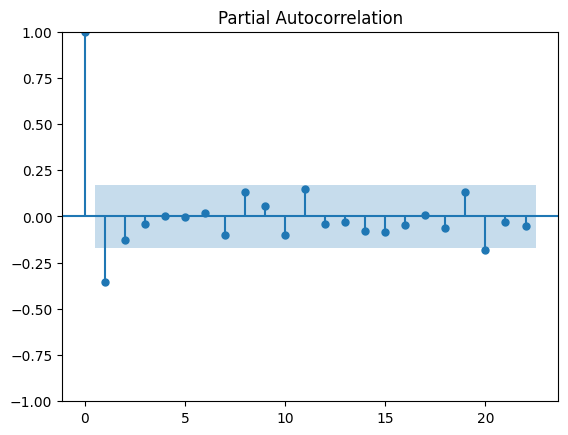

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1956.302, Time=0.40 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1970.152, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1952.597, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1950.511, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1968.269, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1952.315, Time=0.24 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1952.333, Time=0.10 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1954.275, Time=0.47 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1948.968, Time=0.12 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1950.768, Time=0.05 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=1950.748, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1950.896, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=1952.546, Time=0.20 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 2.039 seconds


In [175]:
j=30
dfData = pd.DataFrame(data=mY[j][9:].reshape(int(mY[j][9:].shape[0]/14),14).T , columns=time_index[9:][::14])
plt.plot(dfData.sum(axis=0).diff().dropna())
plt.show()
plot_acf(dfData.sum(axis=0).diff().dropna())
plt.show()
plot_pacf(dfData.sum(axis=0).diff().dropna())
plt.show()

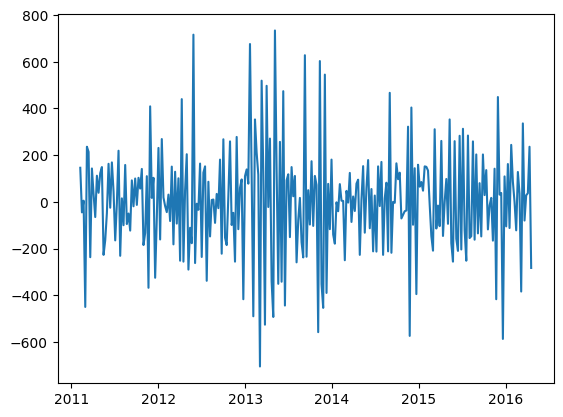

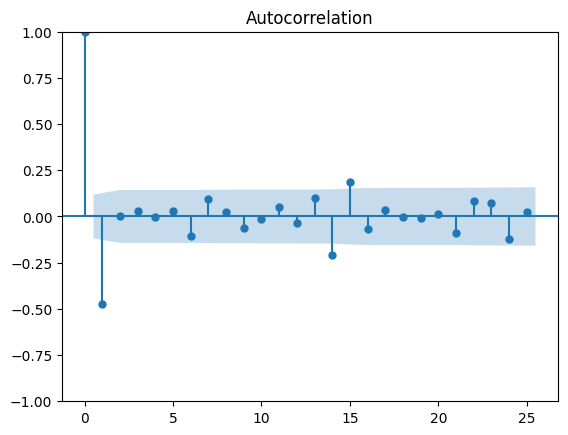

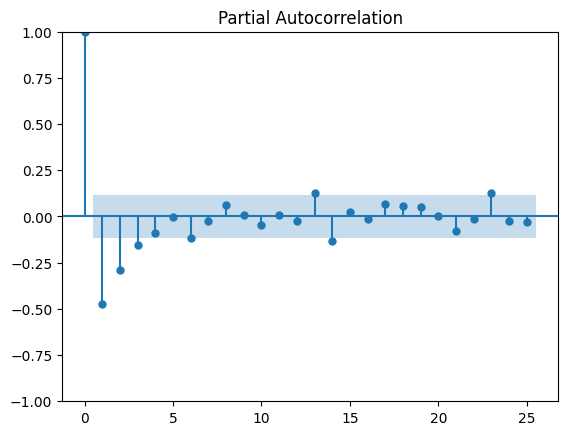

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=3633.018, Time=1.01 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3731.180, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3663.564, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3631.062, Time=0.24 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3729.212, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3632.542, Time=0.62 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=3632.496, Time=0.58 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=3632.529, Time=0.96 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=3629.502, Time=0.19 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=3630.956, Time=0.28 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=3630.907, Time=0.30 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=3661.673, Time=0.24 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=3630.978, Time=0.89 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 5.623 seconds


In [176]:
j=30
dfData = pd.DataFrame(data=mY[j][2:].reshape(int(mY[j][2:].shape[0]/7),7).T , columns=time_index[2:][::7])
plt.plot(dfData.sum(axis=0).diff().dropna())
plt.show()
plot_acf(dfData.sum(axis=0).diff().dropna())
plt.show()
plot_pacf(dfData.sum(axis=0).diff().dropna())
plt.show()


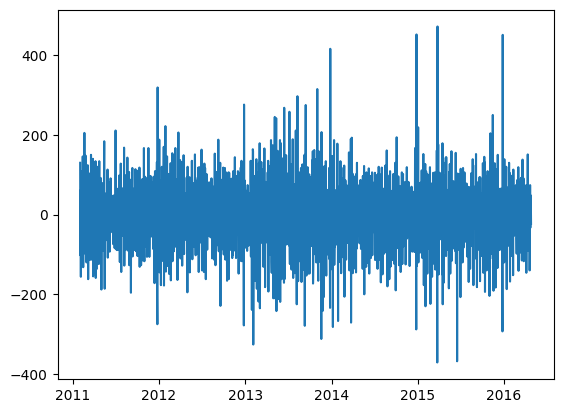

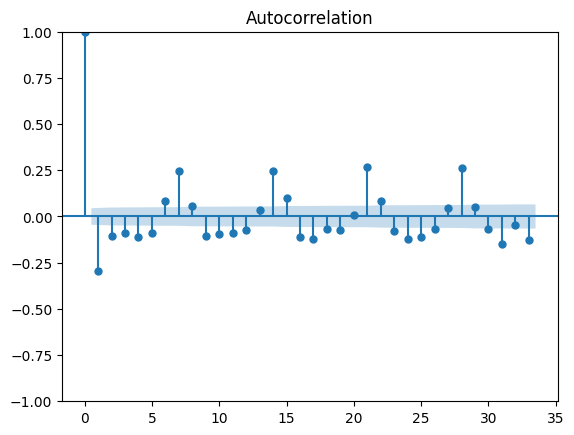

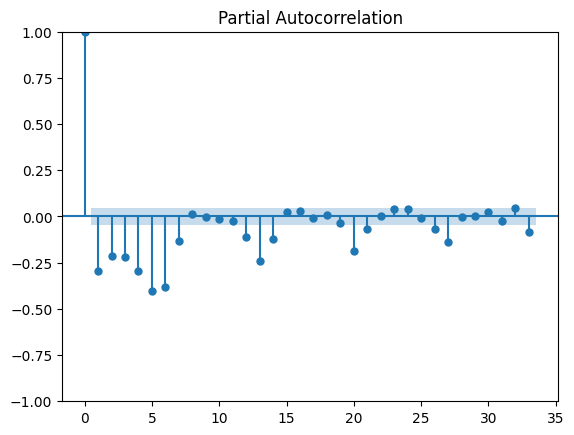

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=21584.143, Time=3.47 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=22578.870, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=22406.376, Time=0.30 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=21816.642, Time=0.64 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=22576.873, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=21705.447, Time=2.04 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=21680.140, Time=2.31 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=21533.313, Time=5.90 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=21597.627, Time=2.62 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=5.83 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=21586.176, Time=6.77 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=21229.779, Time=10.54 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=21705.857, Time=3.86 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=7.36 sec
 ARIMA(1,1,4)(0,0,0)[0] interc

In [177]:
j=30
dfData = pd.DataFrame(data=mY[j][2:].reshape(int(mY[j][2:].shape[0]/1),1).T , columns=time_index[2:][::1])
plt.plot(dfData.sum(axis=0).diff().dropna())
plt.show()
plot_acf(dfData.sum(axis=0).diff().dropna())
plt.show()
plot_pacf(dfData.sum(axis=0).diff().dropna())
plt.show()



In [112]:
vYmean=dfData.values.mean(axis=1)[:, np.newaxis]
mYdemeaned=dfData.values-vYmean

In [113]:
vYmean

array([[298.72058824],
       [283.80882353],
       [290.98529412],
       [306.92647059],
       [344.51470588],
       [390.77941176],
       [398.89705882],
       [312.        ],
       [296.72058824],
       [315.14705882],
       [303.79411765],
       [331.64705882],
       [399.38235294],
       [380.92647059],
       [324.16176471],
       [290.67647059],
       [298.32352941],
       [279.97058824],
       [343.41176471],
       [392.05882353],
       [401.25      ],
       [313.33823529],
       [274.82352941],
       [292.77941176],
       [305.33823529],
       [348.25      ],
       [406.25      ],
       [389.17647059]])

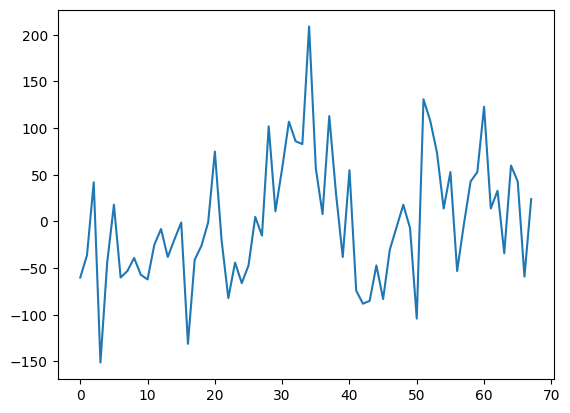

In [114]:
plt.plot(mYdemeaned[27])

In [117]:
from sklearn.decomposition import PCA
pca=PCA(n_components=10)
mPhi = pca.fit_transform(mYdemeaned)
mBeta = pca.components_
pca.explained_variance_ratio_.sum()

0.6744778479803714

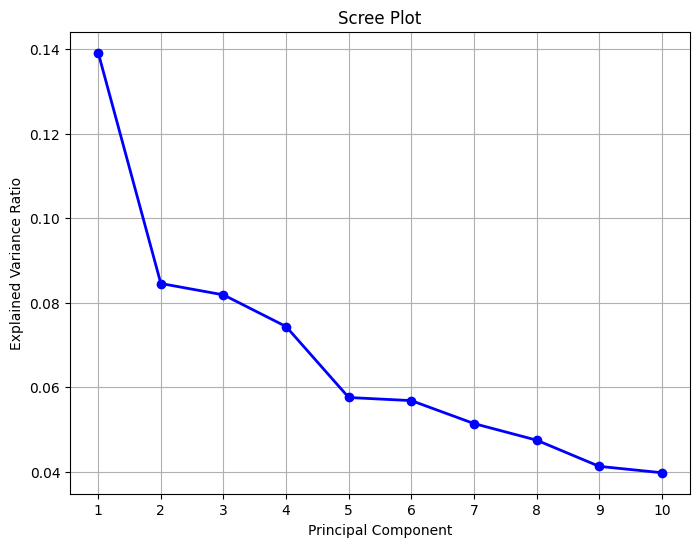

In [118]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, len(pca.explained_variance_ratio_) + 1))
plt.grid()
plt.show()

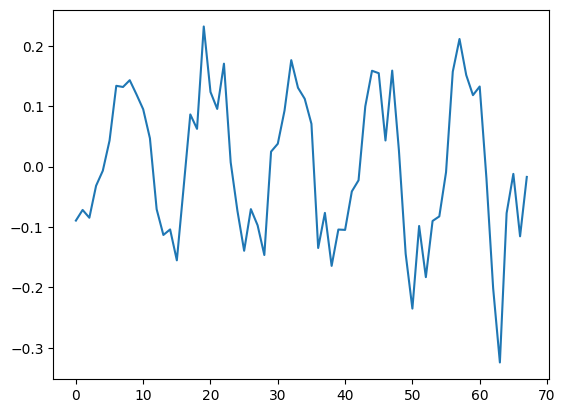

In [84]:
plt.plot(mBeta[0])

In [366]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [119]:
dfData

,2011-02-07,2011-03-07,2011-04-04,2011-05-02,2011-05-30,2011-06-27,2011-07-25,2011-08-22,2011-09-19,2011-10-17,...,2015-07-20,2015-08-17,2015-09-14,2015-10-12,2015-11-09,2015-12-07,2016-01-04,2016-02-01,2016-02-29,2016-03-28
0,273,167,207,243,254,261,263,280,247,223,...,364,353,354,318,314,384,350,410,355,381
1,253,214,183,267,186,263,245,247,241,304,...,330,344,284,322,440,361,295,306,474,270
2,310,275,258,320,268,309,231,282,178,218,...,327,316,329,362,341,346,240,312,333,317
3,309,240,392,291,249,224,258,257,238,282,...,325,303,379,458,317,398,316,350,396,318
4,186,267,233,370,282,435,324,285,352,314,...,385,442,390,473,276,459,263,387,315,391
5,332,370,296,319,285,388,381,392,350,403,...,316,400,484,503,526,476,341,428,396,432
6,380,256,373,341,337,333,328,265,302,411,...,394,524,448,452,392,387,461,453,418,478
7,248,336,236,346,244,321,302,219,210,296,...,431,347,281,312,466,354,412,301,322,332
8,332,227,236,255,267,285,253,219,243,338,...,326,356,374,387,275,419,225,414,294,276
9,253,312,290,236,301,196,283,276,261,349,...,372,326,361,450,379,381,276,425,307,350


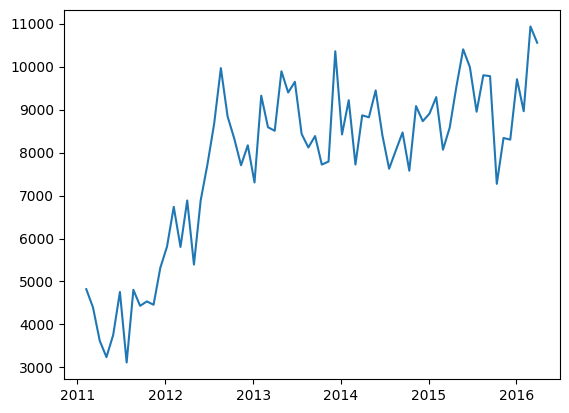

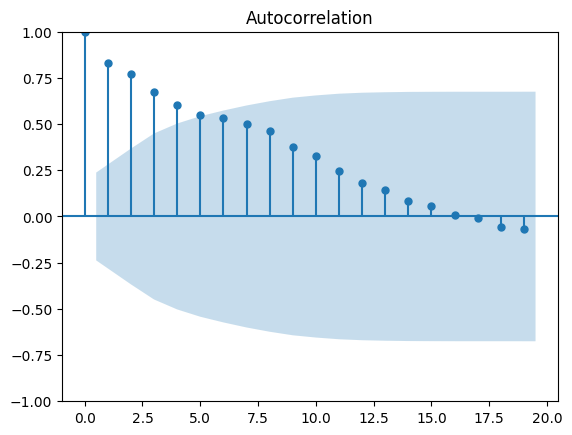

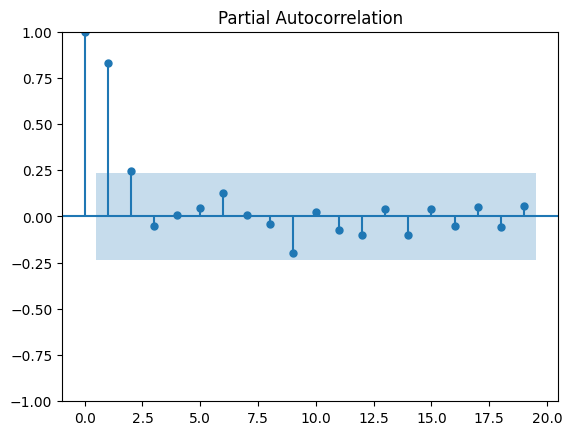

In [126]:
plt.plot(dfData.sum(axis=0))
plt.show()
plot_acf(dfData.sum(axis=0))
plt.show()
plot_pacf(dfData.sum(axis=0))
plt.show()


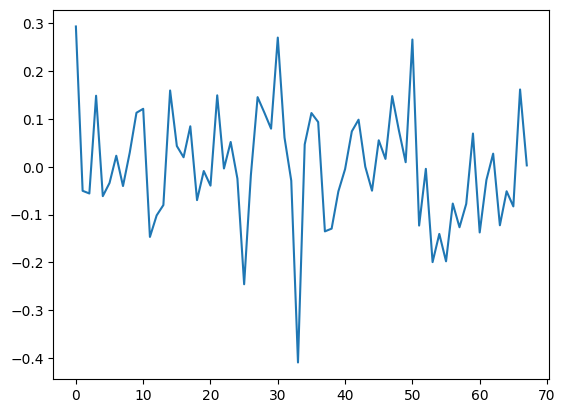

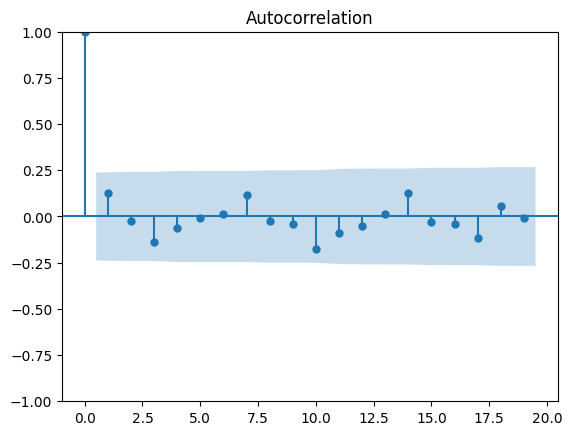

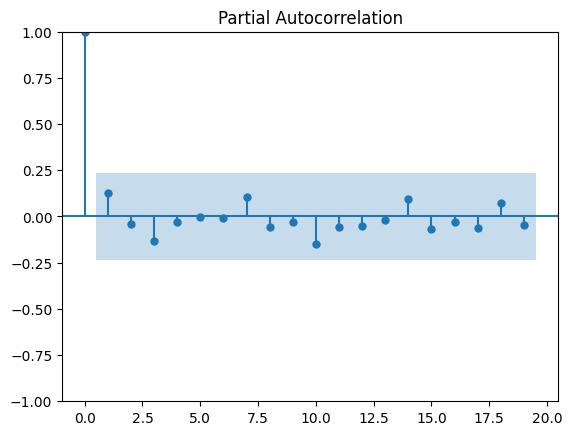

In [122]:
k=1
plt.plot(mBeta[k])
plot_acf(mBeta[k])
plt.show()
plot_pacf(mBeta[k])
plt.show()

In [36]:
mY[0:].shape[1]/7

273.2857142857143

In [45]:
mY[:,2:].shape[1]/7

273.0